Pauta C3a

In [8]:
!pip install geopandas
!pip install rtree
!pip install pygeos

In [9]:
import pandas as pd
import geopandas as gpd

In [10]:
!unzip data.zip

Archive:  data.zip
   creating: data/Areas Urbanas/
  inflating: data/Areas Urbanas/areas_urbanas.dbf  
  inflating: data/Areas Urbanas/areas_urbanas.prj  
  inflating: data/Areas Urbanas/areas_urbanas.sbn  
  inflating: data/Areas Urbanas/areas_urbanas.sbx  
  inflating: data/Areas Urbanas/areas_urbanas.shp  
  inflating: data/Areas Urbanas/areas_urbanas.shp.xml  
  inflating: data/Areas Urbanas/areas_urbanas.shx  
  inflating: data/Areas Urbanas/Disclaimer.txt  
   creating: data/Distritos Censales/
  inflating: data/Distritos Censales/centroides Distritos Censales RM.dbf  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.prj  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.qpj  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.shp  
  inflating: data/Distritos Censales/centroides Distritos Censales RM.shx  
  inflating: data/Distritos Censales/Distritos Censales RM.dbf  
  inflating: data/Distritos Censales/Distritos C

In [12]:
distritos = gpd.read_file('data/Distritos Censales/Distritos Censales RM.shp')
chile_urbano = gpd.read_file('data/Areas Urbanas/areas_urbanas.shp')

Mision 1

In [13]:
distritos.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [14]:
chile_urbano.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.440 5896965.436, 127411.675 5..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.830 5870293.970, 168725.579 5..."
4,Concepción,Ciudad,82986.894378,3.454227e+07,"POLYGON ((133504.854 5919782.212, 136052.580 5..."


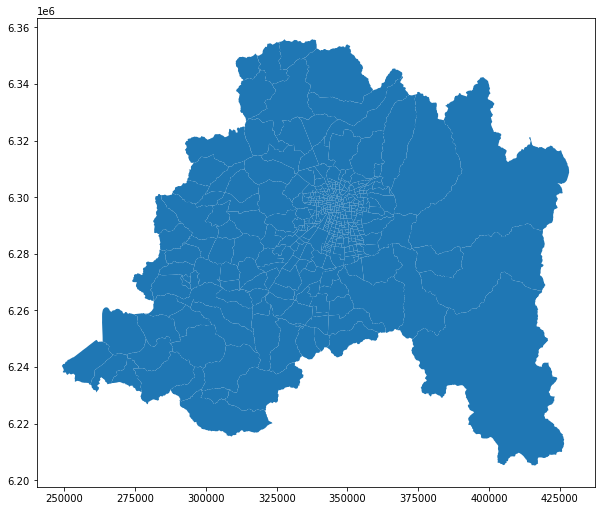

In [15]:
distritos.plot(figsize = (10,10))

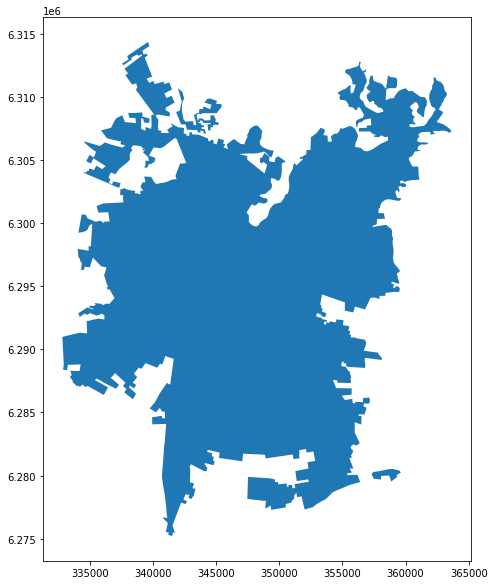

In [16]:
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago']
santiago_urbano.plot(figsize = (10,10))

##LOC ES RECOMENDABLE DE USAR PARA LA BUSQUEDA POR FILAS

In [17]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
santiago_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
distritos_urbano = gpd.overlay(distritos, santiago_urbano, how='intersection')

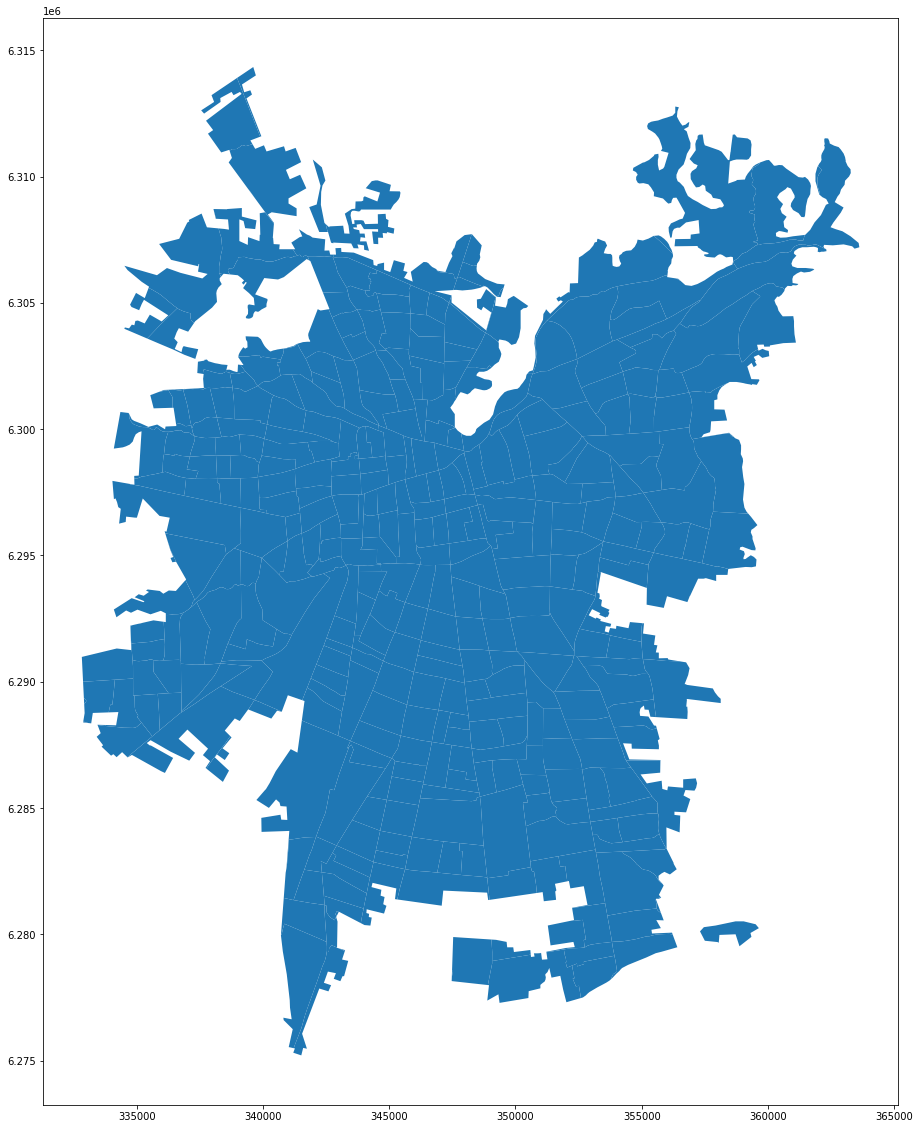

In [47]:
distritos_urbano.plot(figsize = (20,20))

In [21]:
distritos_urbano

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,365.0,3412.0,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((346788.392 6299461.792, 346943.942 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,228.0,2741.0,1166659.89,23.49,21.10,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345961.610 6299612.269, 346298.704 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,113.0,2387.0,509080.85,46.89,12.00,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345650.511 6299703.570, 345809.442 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,...,423.0,5062.0,761738.52,66.45,10.25,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((345672.277 6298980.643, 345689.082 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,...,145.0,2899.0,765782.74,37.86,11.87,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((344041.982 6298246.207, 344940.918 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Región Metropolitana De Santiago,134,Maipo,13401,San Bernardo,Nogales,1340109.0,210.0,1726.0,1711.0,...,72.0,4630.0,2114725.49,21.89,3.40,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((341160.856 6281365.025, 341214.725 6..."
336,Región Metropolitana De Santiago,134,Maipo,13401,San Bernardo,Tejas de Chena,1340110.0,475.0,2269.0,1846.0,...,61.0,5401.0,1771750.98,30.48,3.84,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((341622.283 6282507.833, 341478.834 6..."
337,Región Metropolitana De Santiago,134,Maipo,13401,San Bernardo,Chena,1340111.0,165.0,1424.0,1779.0,...,124.0,4536.0,34934099.30,1.30,0.68,Santiago,Ciudad,427491.444262,5.821041e+08,"MULTIPOLYGON (((341937.870 6288293.598, 342588..."
338,Región Metropolitana De Santiago,134,Maipo,13401,San Bernardo,Estación,1340113.0,320.0,1702.0,1119.0,...,19.0,3509.0,894566.54,39.23,2.70,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((342439.941 6281226.358, 342414.238 6..."


In [22]:
desviaciones_estandar= distritos_urbano[['D', 'E', "C3", "C2", "ABC1"]].std(axis=1) 

In [23]:
distritos_urbano = distritos_urbano.assign(Desviacion = desviaciones_estandar)

In [24]:
distritos_urbano.head(1)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry,Desviacion
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,3412.0,704315.75,48.44,31.09,Santiago,Ciudad,427491.444262,5.821041e+08,"POLYGON ((346788.392 6299461.792, 346943.942 6...",594.389014


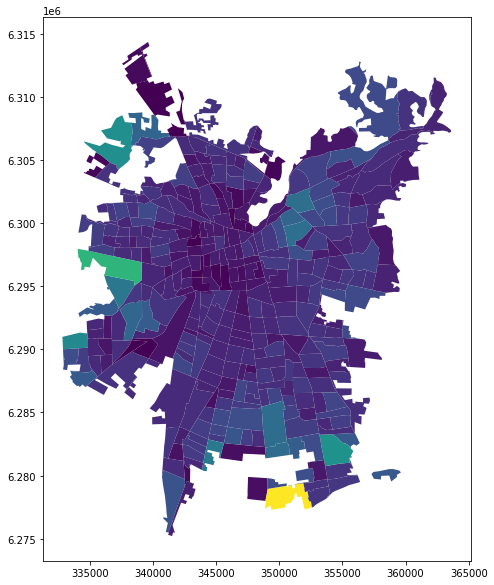

In [25]:
distritos_urbano.plot(figsize = (10,10), column = 'Desviacion',)

Mision 2

In [27]:
estaciones_metro = gpd.read_file('data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')

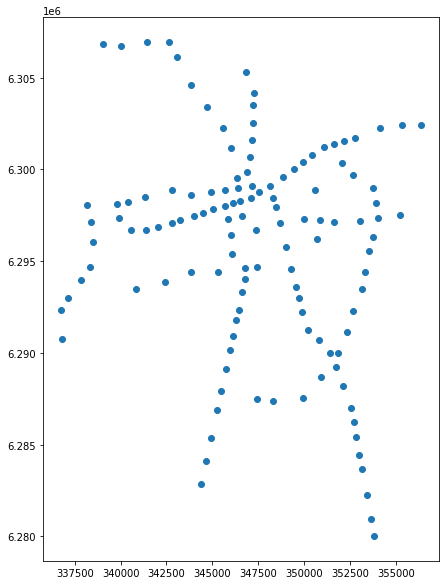

In [28]:
estaciones_metro.plot(figsize=(10,10))

In [29]:
estaciones_metro.head(1)

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)


In [30]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

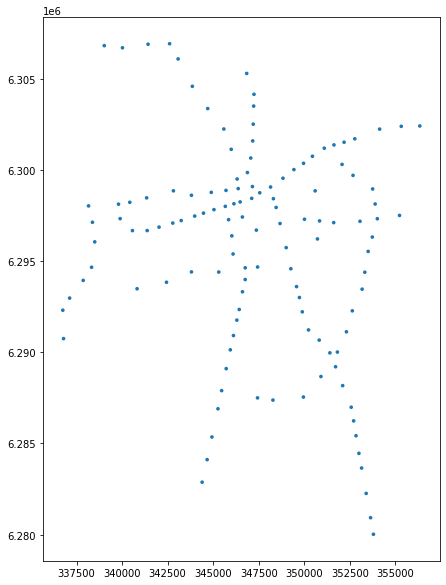

In [31]:
#Buffer crea un borde alrededor de las figuras en dondes acepta puntos que estan dentro de ese rango.

buffer_metro = estaciones_metro.copy()
buffer_metro.geometry = buffer_metro.buffer(100)
buffer_metro.plot(figsize = (10,10))

In [32]:
buffer_metro.iloc[0] #saca el punto de la fila 0

OBJECTID                                                    2
ID_LINEA                                                    2
LINEA                                                      L2
ESTACION                                            EL PARRON
NOMBRE                                              El Parrón
POINT_X                                           345717.3664
POINT_Y                                          6289105.4441
geometry    POLYGON ((345817.3663999997 6289105.4441, 3458...
Name: 0, dtype: object

In [33]:
distritos_metro = gpd.sjoin(distritos, buffer_metro, predicate='intersects')

In [34]:
distritos_metro

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
9,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Vicuña Mackenna,1310110.0,28.0,394.0,1225.0,...,18.44,"POLYGON ((347488.430 6298672.836, 347569.109 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
10,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,San Isidro,1310111.0,53.0,779.0,1892.0,...,14.81,"POLYGON ((346958.269 6298373.448, 347071.088 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",80,84,5,L5,BELLAS ARTES,Bellas Artes,347155.8810,6.299103e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,Teniente Bello,1320115.0,133.0,848.0,1054.0,...,3.35,"POLYGON ((352221.696 6281031.729, 352739.578 6...",7,9,4,L4,LAS MERCEDES,Las Mercedes,353659.7532,6.280834e+06
319,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,San Carlos,1320108.0,92.0,3321.0,7148.0,...,2.49,"POLYGON ((353187.333 6283228.924, 354229.424 6...",82,86,4,L4,PROTECTORA DE LA INFANCIA,Protectora de la Infancia,353400.3951,6.282256e+06
328,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,Padre Hurtado,1320117.0,182.0,2200.0,3323.0,...,5.83,"POLYGON ((353164.445 6283352.105, 353187.333 6...",82,86,4,L4,PROTECTORA DE LA INFANCIA,Protectora de la Infancia,353400.3951,6.282256e+06
320,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,Sótero del Río,1320109.0,31.0,763.0,1730.0,...,2.78,"POLYGON ((354239.318 6283649.540, 354751.933 6...",9,11,4,L4,SOTERO DEL RIO,Sotero del Río,353150.0575,6.283649e+06


In [35]:
distritos_metro.loc[distritos_metro['ESTACION'] == "UNIVERSIDAD DE CHILE"]

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",59,62,1,COMB,UNIVERSIDAD DE CHILE,Universidad de Chile,346604.8868,6.298297e+06
11,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Universidad,1310112.0,35.0,429.0,880.0,...,14.05,"POLYGON ((346463.160 6298239.524, 346522.174 6...",59,62,1,COMB,UNIVERSIDAD DE CHILE,Universidad de Chile,346604.8868,6.298297e+06
12,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Almagro,1310113.0,33.0,404.0,1037.0,...,14.31,"POLYGON ((346079.016 6298132.104, 346463.160 6...",59,62,1,COMB,UNIVERSIDAD DE CHILE,Universidad de Chile,346604.8868,6.298297e+06


In [36]:
distritos_cercanos_metro= distritos_metro.groupby(['OBJECTID', 'ESTACION']).size().reset_index(name='Cantidad')
distritos_cercanos_metro

,OBJECTID,ESTACION,Cantidad
0,2,EL PARRON,4
1,3,CUMMING,2
2,4,QUINTA NORMAL,2
3,5,SAN RAMON,3
4,6,SANTA ROSA,4
...,...,...,...
122,128,LO ERRÁZURIZ,1
123,128,LO ESPEJO,3
124,129,OBSERVATORIO,4
125,130,LO MARTÏNEZ,4


In [37]:
distritos_filtrados= distritos_cercanos_metro.loc[distritos_cercanos_metro['Cantidad'] >= 3]
distritos_filtrados.reset_index()

,index,OBJECTID,ESTACION,Cantidad
0,0,2,EL PARRON,4
1,3,5,SAN RAMON,3
2,4,6,SANTA ROSA,4
3,10,12,LOS QUILLAYES,3
4,14,17,MACUL,3
5,16,19,QUILIIN,3
6,17,20,LOS PRESIDENTES,3
7,18,21,GRECIA,5
8,20,23,PLAZA EGANA,4
9,22,25,PRINCIPE DE GALES,3


Mision 3

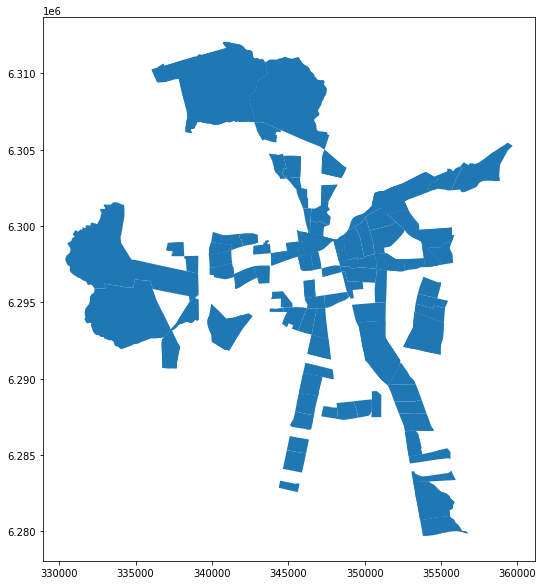

In [38]:
comunas_metro = gpd.sjoin(distritos, estaciones_metro, predicate='intersects')
comunas_metro.plot(figsize= (10, 10))

In [39]:
comunas_metro.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",80,84,5,L5,BELLAS ARTES,Bellas Artes,347155.8810,6.299103e+06
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",55,58,1,L1,LA MONEDA,La Moneda,346187.8506,6.298170e+06
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",59,62,1,COMB,UNIVERSIDAD DE CHILE,Universidad de Chile,346604.8868,6.298297e+06


In [40]:
comunas_cantida_metros= comunas_metro.groupby(['NOM_COM']).size().reset_index(name='Cantidad')
comunas_cantida_metros.sort_values(by= "Cantidad",ascending=False)


,NOM_COM,Cantidad
24,Santiago,22
7,La Florida,9
16,Providencia,8
10,Las Condes,8
25,Ñuñoa,7
11,Lo Prado,6
21,Recoleta,6
12,Macul,6
22,San Miguel,5
18,Puente Alto,5


In [41]:
distritos_com_estaciones= distritos.copy()

In [49]:
comunas_estaciones = pd.merge(distritos_com_estaciones,comunas_cantida_metros, on=["NOM_COM"])
comunas_estaciones.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,Cantidad
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",22
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",22
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",22
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6...",22
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6...",22


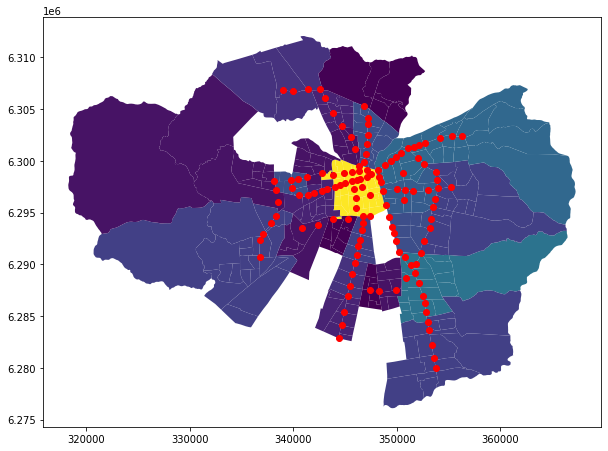

In [51]:
ax= comunas_estaciones.plot(figsize= (10, 10),column="Cantidad")
estaciones_metro.plot(ax = ax, color = 'red')

In [44]:
distritos_por_comuna= pd.merge(comunas_metro,comunas_cantida_metros, on=["NOM_COM"])

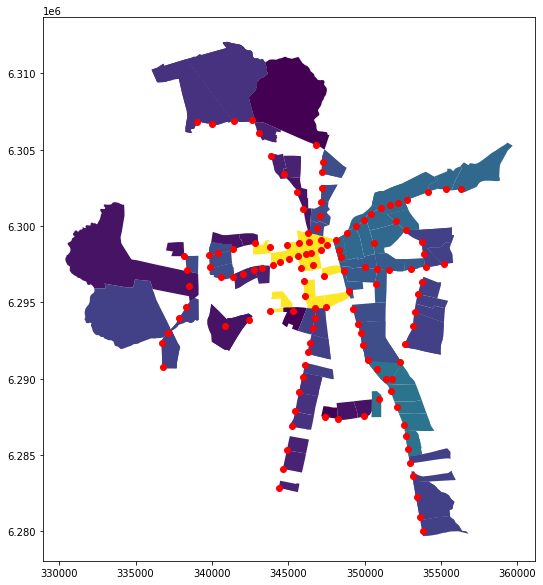

In [46]:
ax= distritos_por_comuna.plot(figsize= (10, 10),column="Cantidad")
estaciones_metro.plot(ax = ax, color = 'red')